In [7]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create the mesh
nx, ny = (1000, 1000)
xmin, xmax = (45.5049722,45.5412594)
ymin, ymax = (-73.6120455,-73.5593741)
mins, maxs = np.array([xmin,ymin]),np.array([xmax,ymax])

x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
delta = np.array([x[1]-x[0],y[1]-y[0]])
xv, yv = np.meshgrid(x, y)

position = np.dstack((xv, yv))

density_map = np.zeros((1000, 1000))
# for i in range(len(lon_short)):
# #for i in range(2):
#     tmp = Gaussian2D(position, weight[i], lon_short[i], 
#                      lat_short[i], sigx=0.0005, sigy=0.0005)
#     danger_map += tmp

In [3]:
with open('../data/routes.pkl','rb') as f:
    dic = pickle.load(f)

In [4]:
for k in range(4,11):
    print('month is %d'%k)
    month = str(k)
    df = pd.read_csv('../data/bixi/BixiMontrealRentals2018/OD_2018-0'+month+'-filtered.csv')
    for j in range(len(df)):
        try:
            route = dic[df['name'].values[j]]
            route = (np.array(route) - mins)/delta
            addition = []
            # Make it such that the largest difference (either in x or in y) per consecutive datapoint makes jumps of 1
            for i in range(len(route)-1):
                diff = (route[i+1,0]-route[i,0],route[i+1,1]-route[i,1])
                max_diff = np.max(diff)
                [addition.append([route[i,0]+max_diff*j/diff[0],route[i,1]+max_diff*j/diff[1]]) for j in range(int(max_diff))]
            coords = np.concatenate((route,np.array(addition)))
            # add count to density map
            for coord in coords:
                if ((coord[0] > 1000) | (coord[1] > 1000)):
                    continue
                else:
                    density_map[int(coord[0]),int(coord[1])] += 1
        except:
            continue


month is 4
month is 5
month is 6
month is 7
month is 8
month is 9
month is 10


FileNotFoundError: File b'../data/bixi/BixiMontrealRentals2018/OD_2018-010-filtered.csv' does not exist

In [5]:
df = pd.read_csv('../data/bixi/BixiMontrealRentals2018/OD_2018-10-filtered.csv')
for j in range(len(df)):
    try:
        route = dic[df['name'].values[j]]
        route = (np.array(route) - mins)/delta
        addition = []
        # Make it such that the largest difference (either in x or in y) per consecutive datapoint makes jumps of 1
        for i in range(len(route)-1):
            diff = (route[i+1,0]-route[i,0],route[i+1,1]-route[i,1])
            max_diff = np.max(diff)
            [addition.append([route[i,0]+max_diff*j/diff[0],route[i,1]+max_diff*j/diff[1]]) for j in range(int(max_diff))]
        coords = np.concatenate((route,np.array(addition)))
        # add count to density map
        for coord in coords:
            if ((coord[0] > 1000) | (coord[1] > 1000)):
                continue
            else:
                density_map[int(coord[0]),int(coord[1])] += 1
    except:
        continue

In [22]:
boolean_map = density_map.copy()
boolean_map[boolean_map != 0] = 1
with open('../data/maps.pkl','wb') as f:
    pickle.dump((density_map,boolean_map),f)
    
with open('../data/maps.pkl','rb') as f:
    density_map,boolean_map = pickle.load(f)


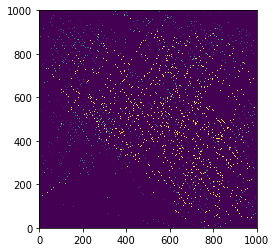

In [28]:
plt.imshow(density_map, origin="lower", cmap='viridis',vmax=0.05*np.max(density_map))
plt.show()

In [26]:
from scipy import interpolate
f = interpolate.interp2d(x,y,density_map, kind='cubic')

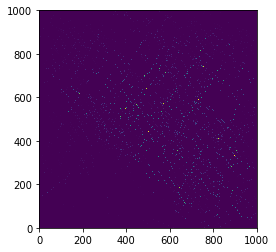

In [27]:
plt.imshow(f(x,y), origin="lower", cmap='viridis',vmax=0.5*np.max(density_map))
plt.show()